In [54]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta

In [150]:
Data=pd.read_csv('C:\\Users\\chana\\Desktop\\Mind Blowing\\mks_presence.2022-11-16.2022-12-16.csv',encoding='UTF-8')

In [151]:
Data = Data.drop(Data.columns[[0]], axis=1)
Data['Hours']=Data['שעות'].str.split(':').str[0]
Data['minutes']=Data['שעות'].str.split(':').str[1] 
Data.head(10)

,שם ח״כ,מפלגה,שעות,ועדות,שאילתות,Hours,minutes
0,אורי מקלב,יהדות התורה,248:51,2,0,248,51
1,אוהד טל,הציונות הדתית בראשות בצלאל סמוטריץ',223:11,3,0,223,11
2,עמיחי אליהו,עוצמה יהודית בראשות איתמר בן גביר,219:10,0,0,219,10
3,יצחק שמעון וסרלאוף,עוצמה יהודית בראשות איתמר בן גביר,205:17,7,0,205,17
4,מאיר פרוש,יהדות התורה,205:02,0,0,205,02
5,משה סעדה,הליכוד,201:45,2,0,201,45
6,איתמר בן גביר,עוצמה יהודית בראשות איתמר בן גביר,195:41,2,0,195,41
7,שמחה רוטמן,הציונות הדתית בראשות בצלאל סמוטריץ',192:28,6,0,192,28
8,יריב לוין,הליכוד,192:12,0,0,192,12
9,שרון ניר,ישראל ביתנו,181:09,1,0,181,09


In [109]:
Data['Hours']=Data['Hours'].astype(int)
Data['minutes']=Data['minutes'].astype(float)
Data['Total_hours']=Data['Hours']+Data['minutes']/60

In [113]:
data_pie=Data.groupby(['מפלגה'])['Total_hours'].sum().reset_index(name='hours_party')
data_pie=data_pie[2:]
data_pie

,מפלגה,hours_party
2,הליכוד,2957.100000
3,המחנה הממלכתי,855.100000
4,העבודה,327.666667
5,הציונות הדתית בראשות בצלאל סמוטריץ',1099.733333
6,התאחדות הספרדים שומרי תורה תנועתו של מרן הרב ע...,1361.633333
7,"חד""ש תע""ל",292.133333
8,יהדות התורה,1069.766667
9,יש עתיד,1960.650000
10,ישראל ביתנו,534.666667
11,נעם - בראשות אבי מעוז,135.650000


Text(0.5, 1.0, 'הגלפמ יפל תסנכב תועש תומכ')

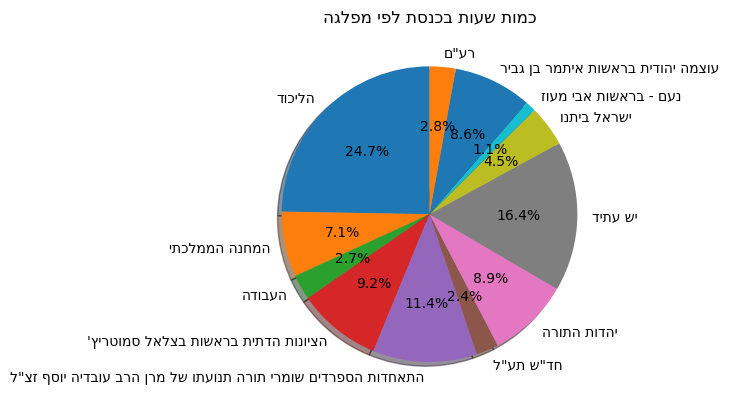

In [138]:
data_pie['party']= data_pie['מפלגה'].apply(lambda x: x[::-1])
plt.pie(data_pie['hours_party'], labels = data_pie['party'],shadow = True,autopct='%1.1f%%',  startangle=90)

Header="כמות שעות בכנסת לפי מפלגה"
Header=Header[::-1]
plt.title(Header)

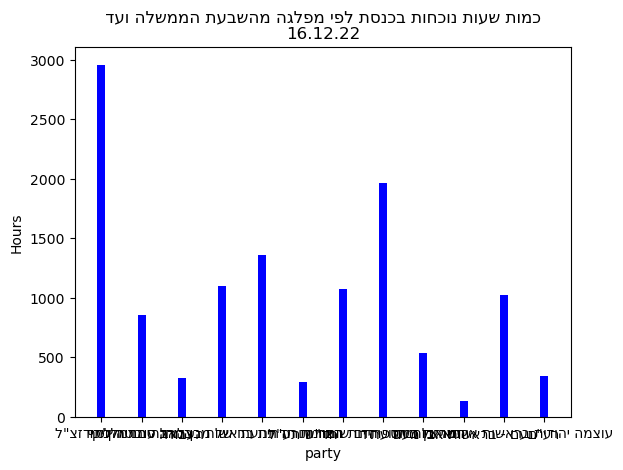

In [129]:
plt.bar(data_pie['party'],data_pie['hours_party'], color ='blue',
        width = 0.2)
Header=" כמות שעות נוכחות בכנסת לפי מפלגה מהשבעת הממשלה ועד "
Header=Header[::-1]
plt.xlabel("party")
plt.ylabel("Hours")
plt.title(Header+'\n'+"16.12.22")
plt.show()

C:\Users\chana\AppData\Local\Temp\ipykernel_2680\131552679.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


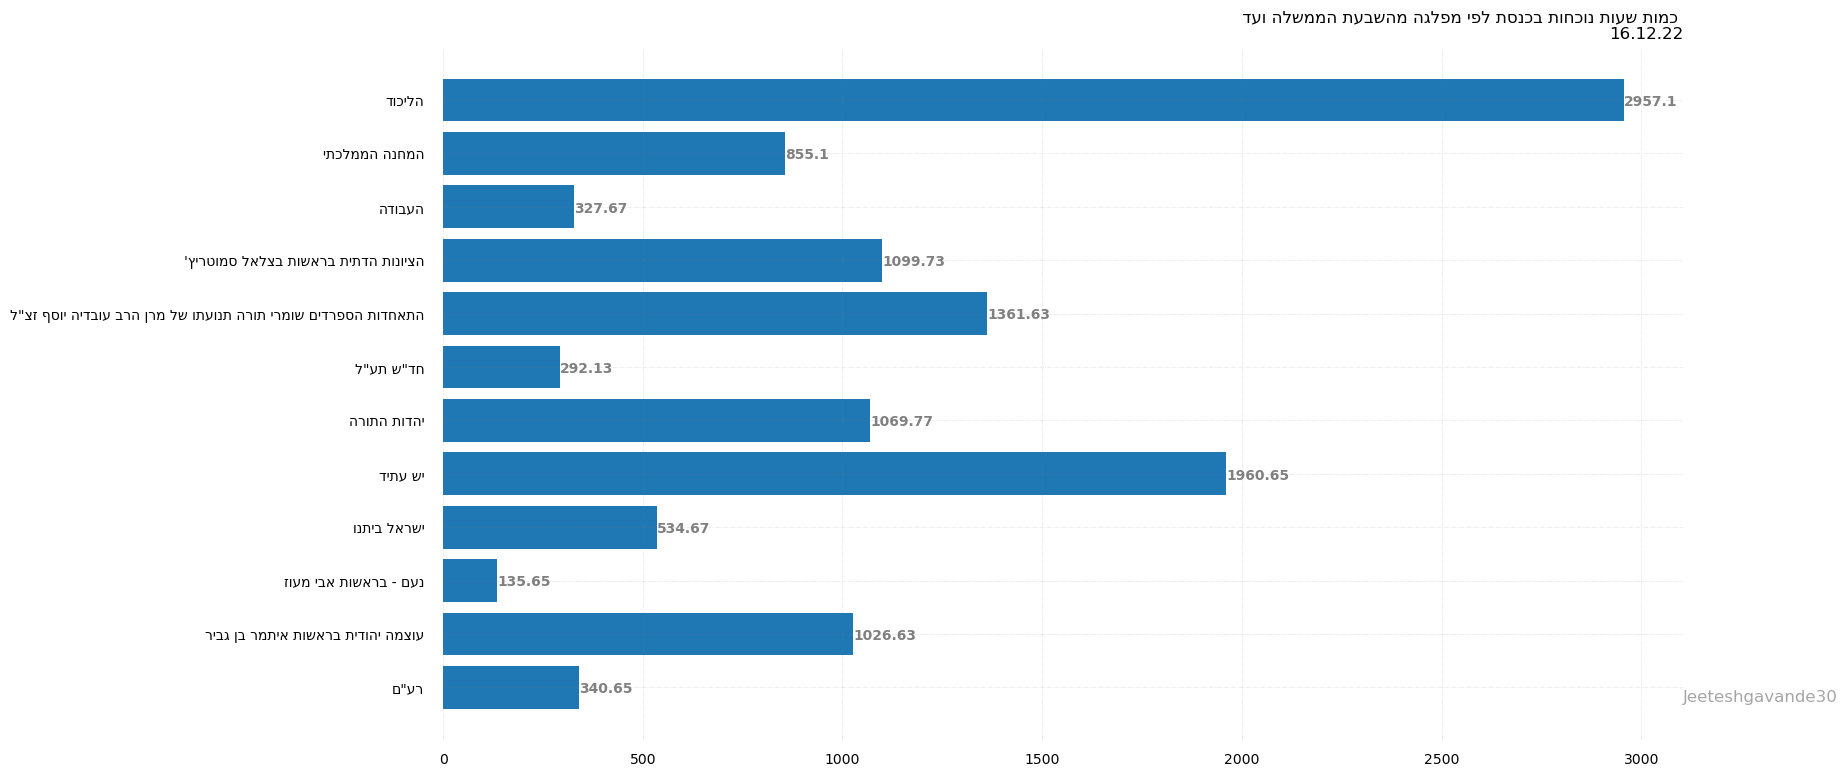

In [147]:
fig, ax = plt.subplots(figsize =(16, 9))
x=data_pie['party']
y=data_pie['hours_party']
ax.barh(x, y)

Header=" כמות שעות נוכחות בכנסת לפי מפלגה מהשבעת הממשלה ועד "
Header=Header[::-1]

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title(Header+'\n'+"16.12.22",
             loc ='right', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='left', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()